<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Image_to_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Mar 31 08:54:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    43W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!pip install --upgrade git+https://github.com/bes-dev/pytorch_clip_interrogator.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bes-dev/pytorch_clip_interrogator.git to /tmp/pip-req-build-91nxkry1
  Running command git clone --filter=blob:none --quiet https://github.com/bes-dev/pytorch_clip_interrogator.git /tmp/pip-req-build-91nxkry1
  Resolved https://github.com/bes-dev/pytorch_clip_interrogator.git to commit edf5e87c8f4d6a3d2dee30a0364c462b6f4f3d93
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

load BLIP model: Salesforce/blip2-opt-2.7b...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

load CLIP model: openai/clip-vit-base-patch32...


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-15211aac7a0664b9/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-1755b5b066eaace8/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1578 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-f2f6ce15cea9db0c/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-0f6f7932a0b1d37b/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset text downloaded and prepared to /root/.cache/huggingface/datasets/text/default-96d02d5b52e25f9f/0.0.0/cb1e9bd71a82ad27976be3b12b407850fe2837d80c22c5e03a28949843a8ace2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

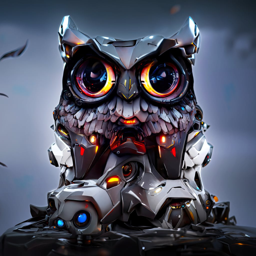

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['an owl with glowing eyes and a robot head, concept art Beeple, shock art, hyperrealistic robot owl, mechanical owl, radiant owl']


In [2]:
import torch
import requests
from PIL import Image
from IPython.display import display
from pytorch_clip_interrogator import PromptEngineer

# build pipeline
pipe = PromptEngineer(
    blip_model="Salesforce/blip2-opt-2.7b",
    clip_model="openai/clip-vit-base-patch32",
    device="cuda",
    torch_dtype=torch.float16
)

# load image
img_url = "https://pharmapsychotic.com/images/robo_owl.jpg"
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
thumb = image.copy()
thumb.thumbnail([256, 256])
display(thumb)


# generate caption
print(pipe(image))

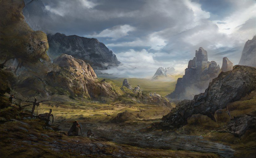

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['the hobbit - the hobbit - the hobbit - the hobbit - the hobbit, a detailed matte painting Andreas Rocha, fantasy art, epic fantasy landscape, matte painting in fantasy style, matte painting of steam machines']


In [4]:
# load image
img_url = "https://tomco.neocities.org/rockland.jpeg"
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
thumb = image.copy()
thumb.thumbnail([256, 256])
display(thumb)


# generate caption
print(pipe(image))

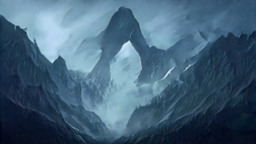

["the dark portal in the middle of a mountain, a detailed matte painting Noah Bradley, fantasy art, dota matte painting concept art, dota! matte painting concept art, odin's stone arena background"]


In [5]:
# load image
img_url = "https://i.ytimg.com/vi/z3lsZcV76KE/maxresdefault.jpg"
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
thumb = image.copy()
thumb.thumbnail([256, 256])
display(thumb)


# generate caption
print(pipe(image))

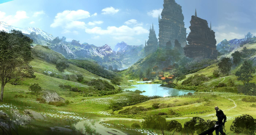

['the fantasy landscape is shown in this image, a detailed matte painting Andor Basch, fantasy art, detailed matte fantasy painting, softair arena landscape, dota! matte painting concept art']


In [6]:
# load image
img_url = "https://i.pinimg.com/originals/55/aa/a9/55aaa9d7a475c281fcb47e242db7feb9.jpg"
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
thumb = image.copy()
thumb.thumbnail([256, 256])
display(thumb)


# generate caption
print(pipe(image))

In [8]:
import locale
print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [9]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [10]:
! git lfs install
! git clone https://huggingface.co/openai/clip-vit-base-patch32

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'clip-vit-base-patch32'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 51 (delta 1), reused 6 (delta 1), pack-reused 45
Unpacking objects: 100% (51/51), 1.29 MiB | 5.80 MiB/s, done.
Filtering content: 100% (3/3), 1.69 GiB | 158.55 MiB/s, done.


In [11]:
! git clone https://huggingface.co/Salesforce/blip2-opt-2.7b

Cloning into 'blip2-opt-2.7b'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 44 (delta 4), reused 5 (delta 2), pack-reused 35
Unpacking objects: 100% (44/44), 1.40 MiB | 6.39 MiB/s, done.
Filtering content: 100% (2/2), 2.42 GiB | 12.07 MiB/s, done.
Encountered 2 file(s) that may not have been copied correctly on Windows:
	pytorch_model-00002-of-00002.bin
	pytorch_model-00001-of-00002.bin

See: `git lfs help smudge` for more details.


In [12]:
# build pipeline
pipe = PromptEngineer(
    blip_model="/content/blip2-opt-2.7b",
    clip_model="/content/clip-vit-base-patch32",
    device="cuda",
    torch_dtype=torch.float16
)

load BLIP model: /content/blip2-opt-2.7b...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

load CLIP model: /content/clip-vit-base-patch32...


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1578 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

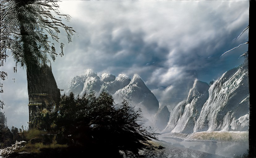

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['a painting of a snowy mountain scene with trees and water, a detailed matte painting Raphael Lacoste, fantasy art, high fantasy matte painting, matte painting in fantasy style, fantasy matte painting']


In [13]:
# load image
img_url = "https://tomco.neocities.org/thetree.png"
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
thumb = image.copy()
thumb.thumbnail([256, 256])
display(thumb)


# generate caption
print(pipe(image))

In [14]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
import shutil

shutil.move("/content/clip-vit-base-patch32","/content/drive/MyDrive/Image_to_Prompt/model_files")

'/content/drive/MyDrive/Image_to_Prompt/model_files/clip-vit-base-patch32'